In [1]:
#LIBRARIES 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

/Users/srihimamshu/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#DATA LOAD

data=pd.read_csv('train_hsbc_df.csv')
data.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C583110837','3','M','28007','M480139044','28007','es_health',44.26,1
1,0,'C1332295774','3','M','28007','M480139044','28007','es_health',324.50,1
2,0,'C1160421902','3','M','28007','M857378720','28007','es_hotelservices',176.32,1
3,0,'C966214713','3','M','28007','M857378720','28007','es_hotelservices',337.41,1
4,0,'C1450140987','4','F','28007','M1198415165','28007','es_wellnessandbeauty',220.11,1


In [3]:
data.shape

(513643, 10)

In [4]:
data.columns

Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513643 entries, 0 to 513642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         513643 non-null  int64  
 1   customer     513643 non-null  object 
 2   age          513643 non-null  object 
 3   gender       513643 non-null  object 
 4   zipcodeOri   513643 non-null  object 
 5   merchant     513643 non-null  object 
 6   zipMerchant  513643 non-null  object 
 7   category     513643 non-null  object 
 8   amount       513643 non-null  float64
 9   fraud        513643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 39.2+ MB


In [6]:
data=data.drop(['step'],axis=1)

#cuz step isn't important

In [7]:
#any missing data

total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


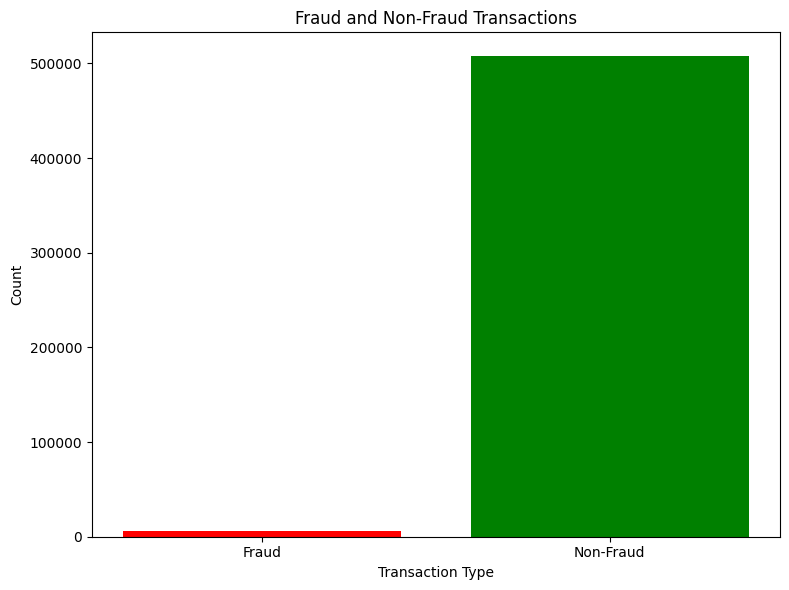

In [8]:
#counting fraud and non-fraud

fraud_count = data["fraud"].value_counts()[1]
non_fraud_count = data["fraud"].value_counts()[0]

d = [fraud_count, non_fraud_count]
labels = ["Fraud", "Non-Fraud"]

plt.figure(figsize=(8, 6))
plt.bar(labels, d, color=['red', 'green'])
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Fraud and Non-Fraud Transactions")
plt.xticks(rotation=0)  
plt.tight_layout()


plt.show()

In [9]:
#IMBALANCED DATASET

#MAJORITY CLASS - NON FRAUD 
#MINORITY CLASS - FRAUD

#HIGH BIAS

In [10]:
#label encoding 

#to enocde numerically the categorical values

In [15]:

data = pd.read_csv("train_hsbc_df.csv")

categorical_cols = ['customer', 'gender', 'zipcodeOri', 'merchant', 'zipMerchant']

missing_cols = [col for col in categorical_cols if col not in data.columns]
if missing_cols:
    print(f"Warning: Columns {', '.join(missing_cols)} not found in data. Ignoring them.")
    categorical_cols = [col for col in categorical_cols if col in data.columns]  # Update list

le = LabelEncoder()

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])



In [ ]:

from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['customer', 'age','gender', 'zipcodeOri', 'merchant', 'zipMerchant', 'category','amount','fraud']
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_data = pd.DataFrame(encoder.fit_transform(data[categorical_cols]))
data = pd.concat([data.drop(categorical_cols, axis=1), encoded_data], axis=1)

/Users/srihimamshu/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis")
plt.title("Correlation Matrix")
plt.show()